Завантаження потрібних бібліотек

In [ ]:
pip install -U dataprep

In [ ]:
pip install -U ydata-profiling

In [3]:
from logging import warning
import pandas as pd
import matplotlib.pyplot as plt
from dataprep.eda import create_report
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_pd = pd.read_excel("/content/Customer details.xlsx")
df_pd.head()

Name           Group  \
0         10 Star Deli Inc  Doras Naturals   
1        14th St Deli Corp    Excel import   
2           17 Greene Farm    Excel import   
3         181 Gourmet Deli  Doras Naturals   
4  1 Bay Ridge Health Food    Excel import   

                               Billing address Billing city Billing state  \
0      299 Myrtle Ave #299, Brooklyn, NY 11205     New York            NY   
1  1133 Brighton Beach Ave, Brooklyn, NY 11235     New York            NY   
2            17 Greene Ave, Brooklyn, NY 11238     New York            NY   
3           815 W 181st St, New York, NY 10033     New York            NY   
4             9220 3rd Ave, Brooklyn, NY 11209     New York            NY   

   Billing zip                             Shipping address Shipping city  \
0        11205      299 Myrtle Ave #299, Brooklyn, NY 11205      New York   
1        11235  1133 Brighton Beach Ave, Brooklyn, NY 11235      New York   
2        11238            17 Greene Ave, Brooklyn, NY 11238      New York   
3        10033           815 W 181st St, New York, NY 10033      New York   
4        11209             9220 3rd Ave, Brooklyn, NY 11209      New York   

  Shipping state  Shipping zip  ... Contact name Contact role  Contact phone  \
0             NY         11205  ...           Mo      Primary            NaN   
1             NY         11235  ...          NaN          NaN            NaN   
2             NY         11238  ...          NaN          NaN            NaN   
3             NY         10033  ...          Sam      Primary     9178915421   
4             NY         11209  ...          NaN          NaN            NaN   

  Contact email Order direct access Total orders Total sales Business Fax  \
0           NaN                  No            0        0.00          NaN   
1           NaN                  No            0        0.00          NaN   
2           NaN                  No            0        0.00          NaN   
3           NaN                  No            1      249.04          NaN   
4           NaN                  No            0        0.00          NaN   

  Primary payment method Licenses & certifications  
0                    NaN                       NaN  
1                    NaN                       NaN  
2                    NaN                       NaN  
3                    NaN                       NaN  
4                    NaN                       NaN  

[5 rows x 26 columns]

In [7]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       1118 non-null   object 
 1   Group                      1118 non-null   object 
 2   Billing address            1118 non-null   object 
 3   Billing city               1118 non-null   object 
 4   Billing state              1118 non-null   object 
 5   Billing zip                1118 non-null   int64  
 6   Shipping address           1118 non-null   object 
 7   Shipping city              1118 non-null   object 
 8   Shipping state             1118 non-null   object 
 9   Shipping zip               1118 non-null   int64  
 10  Phone                      967 non-null    object 
 11  Payment terms              1113 non-null   object 
 12  Customer discount          1118 non-null   float64
 13  Territory                  1063 non-null   objec

In [8]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_pd, title="Profiling Report")

In [9]:
# @title Репорт Customer_details
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

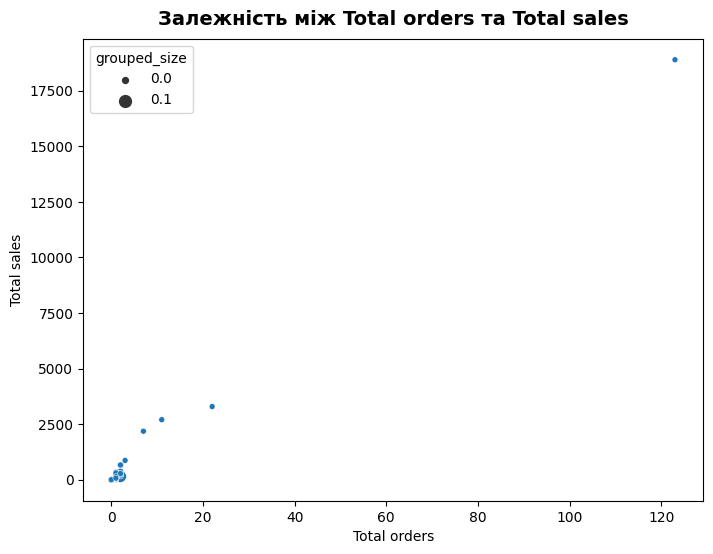

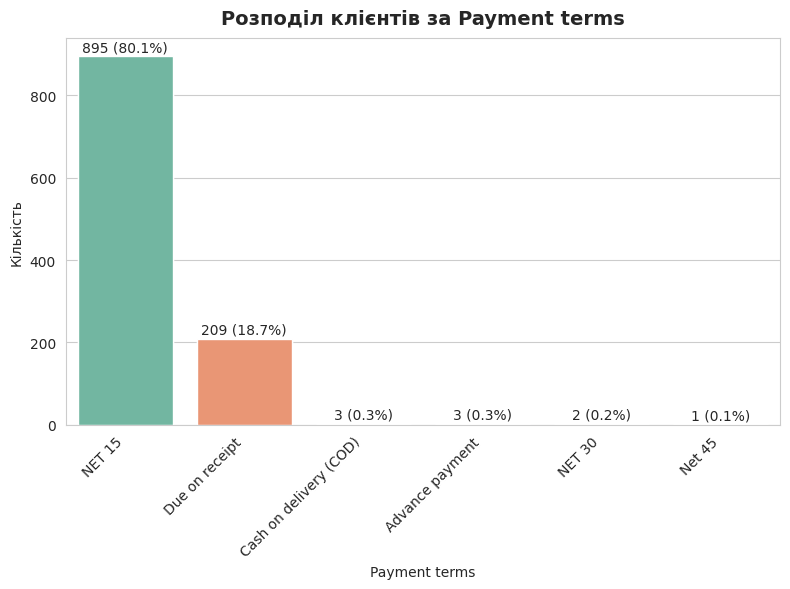

In [10]:
# @title Візуалізація Customer_details
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def scatter_with_size_and_grouping(df, x_col, y_col, size_col, hue_col=None, threshold=25):
  """
  Створює scatter plot з розміром точок, що відповідає третій змінній, та групуванням значень більше порогу.

  Args:
      df: pandas DataFrame з даними.
      x_col: Назва стовпця з x-змінною.
      y_col: Назва стовпця з y-змінною.
      size_col: Назва стовпця з змінною для розміру точок.
      hue_col: Назва стовпця з змінною для кольору точок (опціонально).
      threshold: Поріг для групування значень (за замовчуванням 25).
  """
  df_copy = df.copy()  # Створення копії, щоб не змінювати вихідний DataFrame

  # Розділення даних на дві групи за порогом
  df_below_threshold = df_copy[df_copy[size_col] <= threshold]
  df_above_threshold = df_copy[df_copy[size_col] > threshold]

  # Обчислення кількості входжень для кожної групи
  counts_below = df_below_threshold[size_col].value_counts().sort_index()
  count_above = df_above_threshold[size_col].count()

  # Створення нових стовпців з груповими значеннями та розмірами
  df_below_threshold['grouped_size'] = df_below_threshold[size_col]
  df_above_threshold['grouped_size'] = f"{threshold}+"

  df_grouped = pd.concat([df_below_threshold, df_above_threshold])

  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=x_col, y=y_col, size='grouped_size', hue=hue_col, data=df_grouped)
  plt.title(f"Залежність між {x_col} та {y_col}", fontweight="black", size=14, pad=10)
  plt.show()

def bar_plot_sorted_with_percentages(df, col):
  """
  Створює bar chart для категоріальної змінної з сортуванням стовпців та відображенням значень і відсотків.

  Args:
      df: pandas DataFrame з даними.
      col: Назва стовпця з категоріальною змінною.
  """
  plt.figure(figsize=(8, 6))
  sns.set_style("whitegrid")
  palette = sns.color_palette("Set2")
  # Обчислення кількості та відсотків
  counts = df[col].value_counts().sort_values(ascending=False)
  percentages = (counts / len(df)) * 100

  # Створення bar chart
  bars = plt.bar(counts.index, counts)
  sns.barplot(x=counts.index, y=counts.values, palette=palette)
  # Додавання значень та відсотків над стовпцями
  for bar, count, percentage in zip(bars, counts, percentages):
      height = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, height + 5,
               f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

  plt.xlabel(col)
  plt.ylabel('Кількість')
  plt.title(f"Розподіл клієнтів за {col}", fontweight="black", size=14, pad=10)
  plt.xticks(rotation=45, ha='right')  # Обертання підписів по осі X для кращої читабельності
  plt.tight_layout()  # Автоматичне налаштування відступів
  plt.show()


#Виклик функцій візуалізації
scatter_with_size_and_grouping(df_pd, 'Total orders', 'Total sales', 'Customer discount')
bar_plot_sorted_with_percentages(df_pd, 'Payment terms')


In [11]:
# @title Функція візуалізації розподілів даних
import matplotlib.pyplot as plt
import pandas as pd

def plot_non_zero_sales_grouped(df, sales_col='Total sales', threshold=500):
  """
  Створює точковий графік зі з'єднаними точками, групуючи значення вище порогу та виключаючи нулі.

  Args:
      df (pd.DataFrame): DataFrame, що містить дані про продажі.
      sales_col (str, optional): Назва стовпця, що містить значення продажів.
                                         За замовчуванням - 'Total sales'.
      threshold (int, optional): Поріг, вище якого значення групуються.
                                  За замовчуванням - 500.
  """
  # Фільтрування нульових значень
  df_filtered = df[df[sales_col] > 0]

  # Створення окремих DataFrame для значень нижче та вище порогу
  df_below_threshold = df_filtered[df_filtered[sales_col] <= threshold]
  df_above_threshold = df_filtered[df_filtered[sales_col] > threshold]

  # Обчислення кількості входжень для кожного DataFrame
  counts_below = df_below_threshold[sales_col].value_counts().sort_index()
  count_above = df_above_threshold[sales_col].count()

  # Об'єднання значень та кількості входжень для побудови графіка
  values = counts_below.index.tolist() + [f"{threshold}+"]
  counts = counts_below.values.tolist() + [count_above]

  plt.figure(figsize=(10, 6))
  plt.plot(values, counts, marker='o', linestyle='-', linewidth=1, color='tab:blue')

  plt.xlabel("Значення загальних продажів", fontsize=12)  # Підпис осі X: "Значення загальних продажів"
  plt.ylabel("Кількість входжень", fontsize=12)  # Підпис осі Y: "Кількість входжень"
  plt.title("Розподіл ненульових загальних продажів", fontsize=14, fontweight='bold')  # Заголовок: "Розподіл ненульових загальних продажів"
  plt.xticks(rotation=45, ha='right')

  plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
  plt.gca().spines[['top', 'right']].set_visible(False)

  plt.tight_layout()
  plt.show()

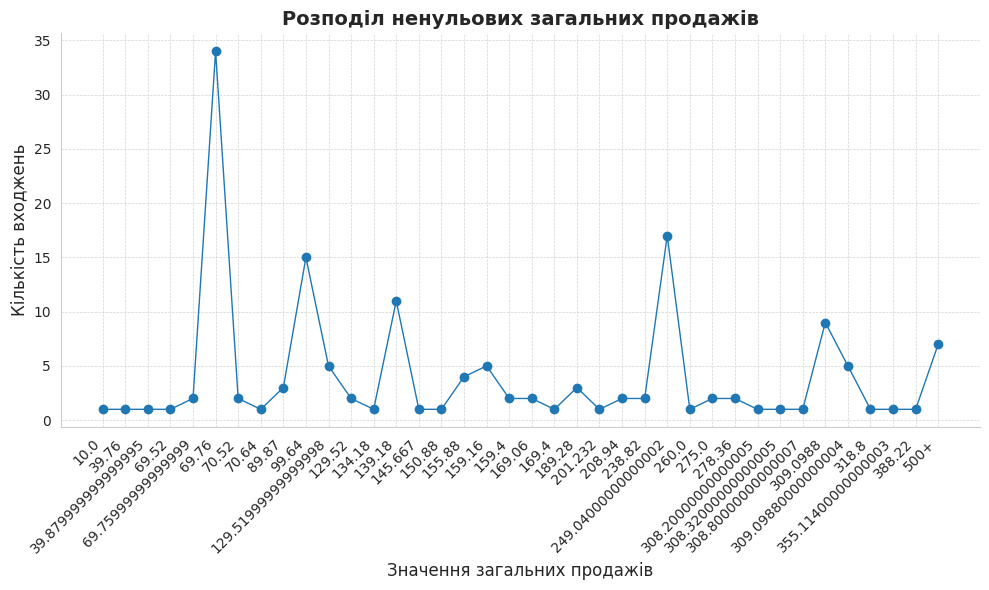

In [12]:
# @title Розподіл даних продажів
plot_non_zero_sales_grouped(df_pd)

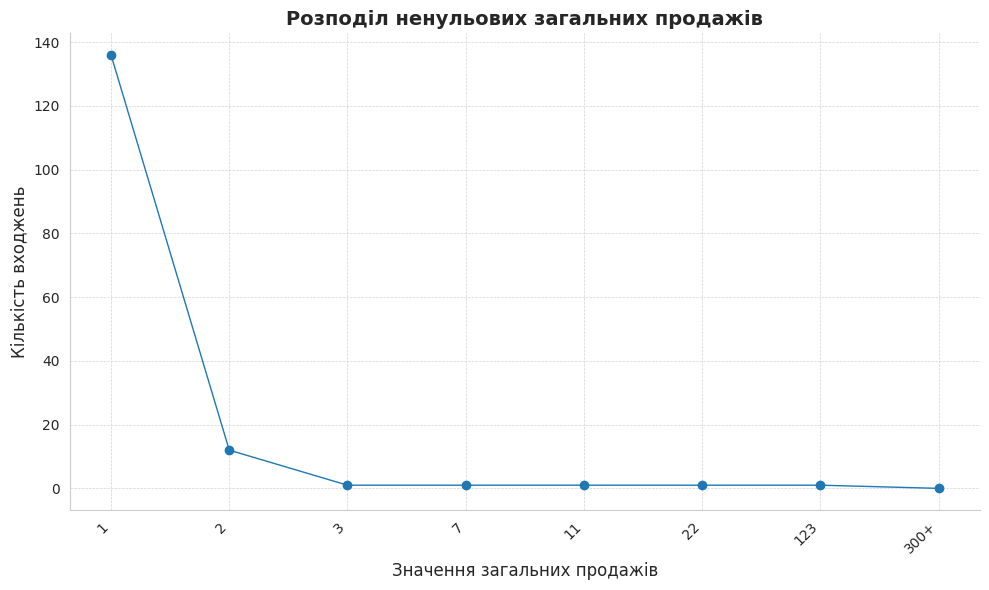

In [13]:
# @title Розподіл замовлень
plot_non_zero_sales_grouped(df_pd, sales_col='Total orders', threshold=300)

In [44]:
# @title Аналіз імейлів
import pandas as pd
import matplotlib.pyplot as plt

# Функція для створення кругової діаграми
def create_pie_chart(df_pd):
    email_count = df_pd['Contact email'].notna().sum()
    empty_count = df_pd['Contact email'].isna().sum()
    #Словник з даними для кругової діаграми
    pie_data = {'Emails': email_count, 'Не вказали почту': empty_count}
    plt.figure(figsize=(6,6))
    plt.pie(pie_data.values(), labels=pie_data.keys(), autopct='%1.1f%%')
    plt.axis('equal')
    plt.title('Email distribution')
    plt.show()

# Функція для створення бар діаграми
def create_bar_chart(df_pd):
    email_counts = df_pd['Contact email'].value_counts()[:10]
    email_counts = email_counts.sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    sns.set_style("whitegrid")
    palette = sns.color_palette("Set2")
    counts = email_counts
    percentages = (counts / len(df_pd)) * 100

    # Створення bar chart
    bars = plt.bar(counts.index, counts)
    sns.barplot(x=counts.index, y=counts.values, palette=palette)
    # Додавання значень та відсотків над стовпцями
    for bar, count, percentage in zip(bars, counts, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f"{count} ({percentage:.1f}%)", ha='center', va='bottom')

    plt.xlabel('Email')
    plt.ylabel('Кількість')
    plt.title('Email distribution', fontweight="black", size=14, pad=10)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

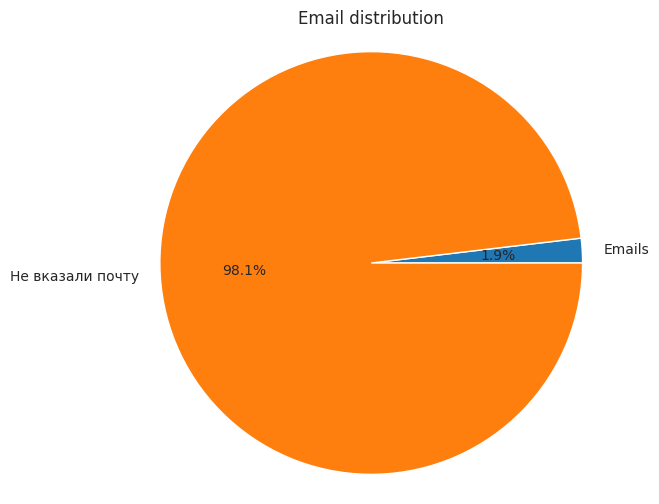

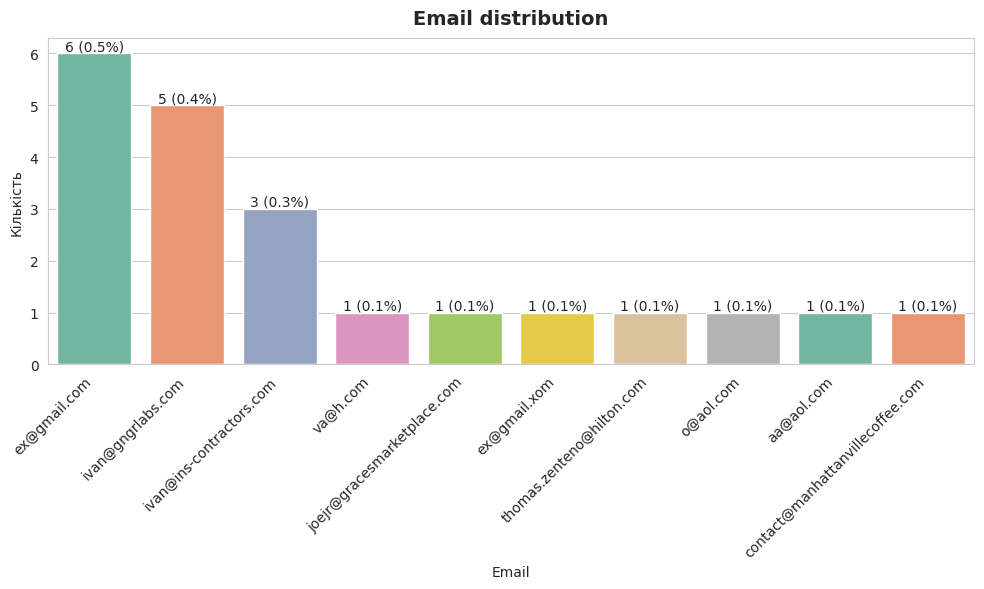

In [45]:
create_pie_chart(df_pd)
create_bar_chart(df_pd)